### 超平面绘制函数

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl,
                    edgecolor='black')

### Perceptron Class

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state



    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # 每轮只随机选择一个误分类点更新权重
    def fit1(self, X, y):
      import random
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []
      for _ in range(self.n_iter):
        errors = 0
        misclassified = []
        for xi, target in zip(X, y):
          if self.predict(xi) != target:
            misclassified.append((xi, target))
        errors = len(misclassified)
        if misclassified:
          xi, target = random.choice(misclassified)
          update = self.eta * (target - self.predict(xi))
          self.w_[1:] += update * xi
          self.w_[0] += update
        self.errors_.append(errors)
      return self

    # 每轮只用遇到的第一个误分类点更新权重
    def fit2(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []
      for _ in range(self.n_iter):
        errors = 0
        updated = False
        for xi, target in zip(X, y):
          if target != self.predict(xi) and not updated:
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
            errors += 1
            updated = True
          if target != self.predict(xi):
            errors += 1
        self.errors_.append(errors)
      return self

    # 每轮先随机打乱数据顺序，再顺序遍历
    def fit3(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []
      for _ in range(self.n_iter):
        errors = 0
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in indices:
          xi, target = X[i], y[i]
          update = self.eta * (target - self.predict(xi))
          self.w_[1:] += update * xi
          self.w_[0] += update
          errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

    # 每轮统计所有误分类点， 累计更新权重
    def fit4(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []
      for _ in range(self.n_iter):
        errors = 0
        total_update = np.zeros_like(self.w_)
        for xi, target in zip(X, y):
          update = self.eta * (target - self.predict(xi))
          total_update[1:] += update * xi
          total_update[0] += update
          errors += int(update != 0.0)
        self.w_ += total_update
        self.errors_.append(errors)
      return self
    
    # 交互式
    def fit5(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []

      for epoch in range(self.n_iter):
        misclassified = []
        for idx, (xi, target) in enumerate(zip(X, y)):
          if self.predict(xi) != target:
            misclassified.append((idx, xi, target))
        errors = len(misclassified)
        self.errors_.append(errors)
        print(f"\nEpoch {epoch+1}: {errors} misclassified points.")
        if not misclassified:
          print("No misclassified points, training complete.")
          break
        print(f"Misclassified points (index, x2, x1, label):")
        for i, (idx, xi, target) in enumerate(misclassified):
          print(f"{i}: idx={idx}, x2={xi[0]}, x1={xi[1]}, label={target}")
        # 用户选择
        choice = int(input("Select which misclassified point to update (0-{len(misclassified)-1}): "))
        idx, xi, target = misclassified[choice]
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        # 绘制当前决策边界
        plt.figure()
        plot_decision_regions(X, y, classifier=self)
        plt.title(f"After update at epoch {epoch+1}")
        plt.xlabel('x2')
        plt.ylabel('x1')
        plt.legend(loc='upper left')
        plt.show()
      return self


    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 读取csv文件

In [3]:
import pandas as pd

df = pd.read_csv('test.data', header=None)
df

,0,1,2
0,3,3,1
1,4,3,1
2,1,1,-1


### 可视化三个点的具体位置

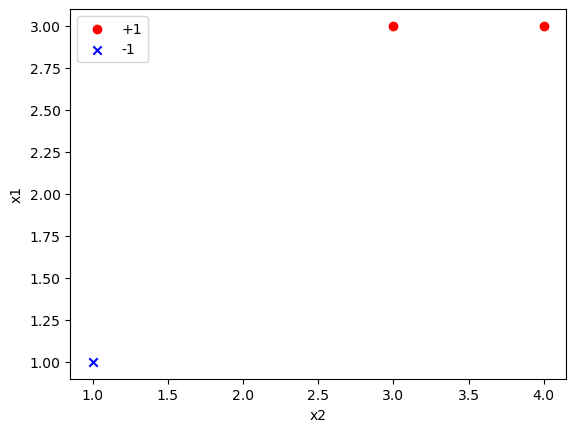

In [4]:
y = df.iloc[:, 2].values
X = df.iloc[:, [0, 1]].values
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', label='+1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', marker='x', label='-1')
plt.xlabel('x2')
plt.ylabel('x1')
plt.legend(loc='upper left')

plt.show()

### 训练开始


Epoch 1: 3 misclassified points.
Misclassified points (index, x2, x1, label):
0: idx=0, x2=3, x1=3, label=1
1: idx=1, x2=4, x1=3, label=1
2: idx=2, x2=1, x1=1, label=-1


/tmp/ipykernel_5813/4092396187.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


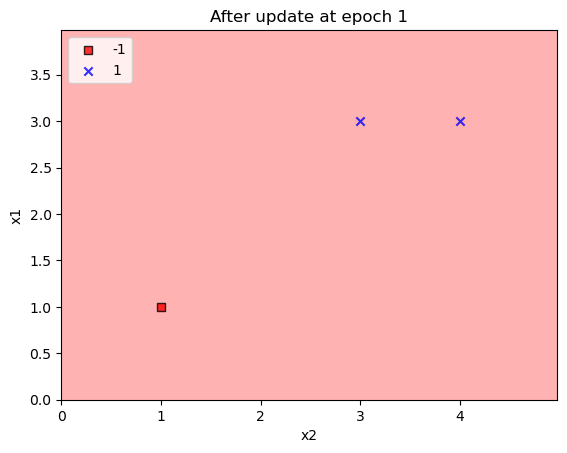


Epoch 2: 1 misclassified points.
Misclassified points (index, x2, x1, label):
0: idx=2, x2=1, x1=1, label=-1


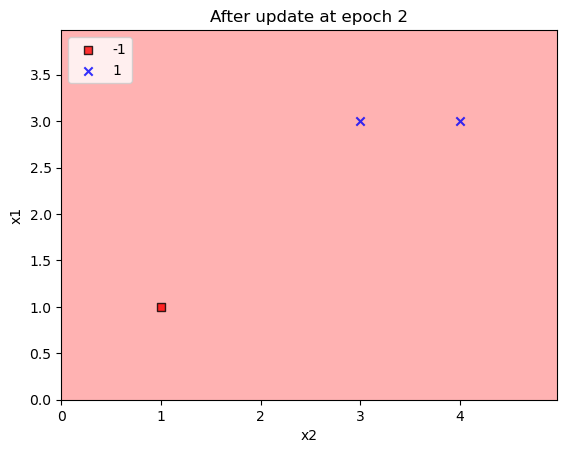


Epoch 3: 1 misclassified points.
Misclassified points (index, x2, x1, label):
0: idx=2, x2=1, x1=1, label=-1


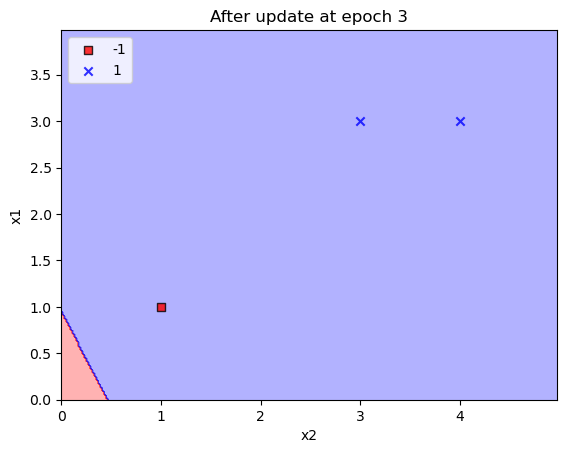


Epoch 4: 1 misclassified points.
Misclassified points (index, x2, x1, label):
0: idx=2, x2=1, x1=1, label=-1


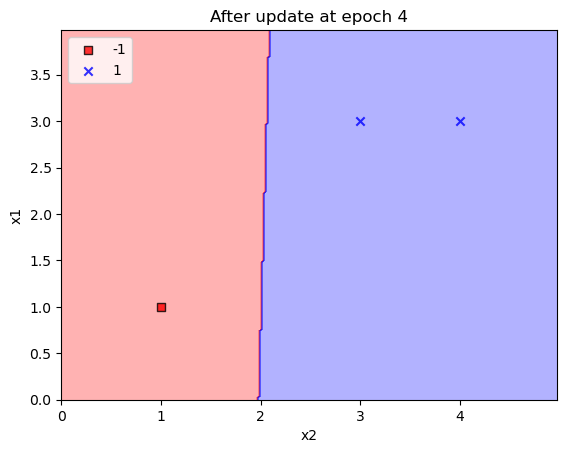


Epoch 5: 0 misclassified points.
No misclassified points, training complete.


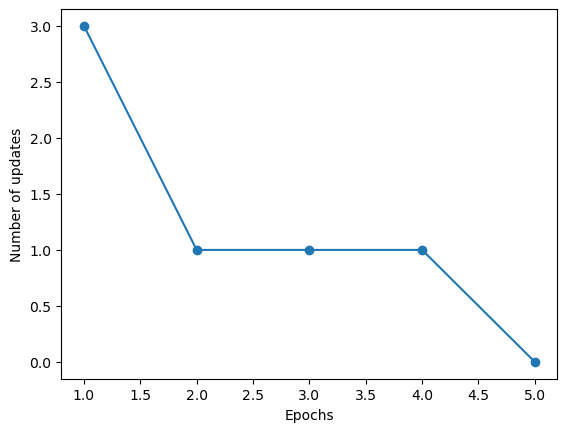

In [5]:
ppn = Perceptron(eta=0.1, n_iter=20)

# 可以通过不同的fit方法来测试不同的更新策略
# ppn.fit(X, y)
# ppn.fit1(X, y)
# ppn.fit2(X, y)
# ppn.fit3(X, y)
# ppn.fit4(X, y)
ppn.fit5(X, y) 

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### 为fit函数准备，因为在其函数中没有包含超平面的绘制函数

/tmp/ipykernel_5813/4092396187.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


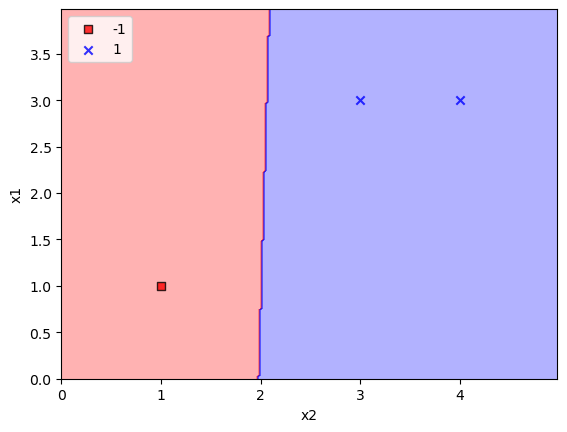

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('x2')
plt.ylabel('x1')
plt.legend(loc='upper left')


plt.show()

### 计算三个点与超平面之间的垂直距离，并返回最小值(margin)

In [7]:
def min_distance_to_hyoerplane(points, w):
  distances = []
  for x in points:
    d = abs(np.dot(w[1:], x) + w[0]) / np.linalg.norm(w[1:])
    distances.append(d)
  min_dist = min(distances)
  print("Distances to hyperplane:", distances)
  print("Minium distance:", min_dist)
  return min_dist

points = np.array([[1, 1], [3, 3], [4, 3]])
min_distance_to_hyoerplane(points, ppn.w_)

Distances to hyperplane: [np.float64(1.006194568548343), np.float64(0.9386002176674437), np.float64(1.9382293646908224)]
Minium distance: 0.9386002176674437


np.float64(0.9386002176674437)